### <center>Muhammad Aryan Fathurrahman</center>
#### <center>F1D022069</center>

# Jurnal Modul 4

## Melakukan Import Library

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Code di atas ini berfungsi untuk mengimport library dari matplotlib.pyplot, numpy, dan opencv. Untuk masing-masing library diberikan as atau alias yaitu plt untuk matplotlib.pyplot, np untuk numpy,dan cv untuk cv2 atau opencv. Pemberian as atau alias ini berguna untuk mempersingkat baris code ketika memanggil library yang diinginkan dan menginisialisasi variabel yang digunakan dalam program.

## Menampilkan CItra asli

Code di bawah ini membaca data dari sebuah citra dengan menggunakan `imread()` yang berasal dari library matplotlib.pyplot, kemudian citra yang diambil yaitu `manchester_united.jpeg` dan diberikan sebuah nama yaitu foto. Namun, karena citra berada di folder yang berbeda maka harus keluar dari folder saat ini dan masuk ke folder lain, jadi perintahnya akan jadi seperti berikut `../assets/manchester_united.jpeg`. Setelah citra atau gambar tersebut dibaca, selanjutnya citra akan ditampilkan dengan menggunakan `imshow()` yang berasal juga dari library matplotlib.pyplot. Untuk `axis()` berfungsi menghilangkan sumbu x dan y.

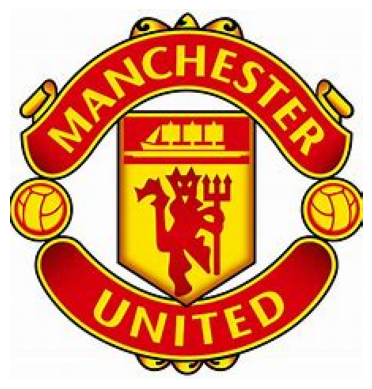

In [156]:
foto = plt.imread("../assets/manchester_united.jpeg")
plt.imshow(foto)
plt.axis("off")
plt.show()

## Menampilkan Citra Grayscale

Code di bawah ini merubah warna gambar asli menjadi warna abu-abu, dengan menggunakan `cv.cvtColor(foto, cv.COLOR_BGR2GRAY)` yang berasal dari library opencv atau cv2. Kemudian gambar akan ditampilkan menggunakan library dari matplotlib yaitu `imshow()` yang diisi dengan variabel `grayImg` dan tidak lupa memberikan warna pada map yaitu dengan cara `cmap='gray'`.

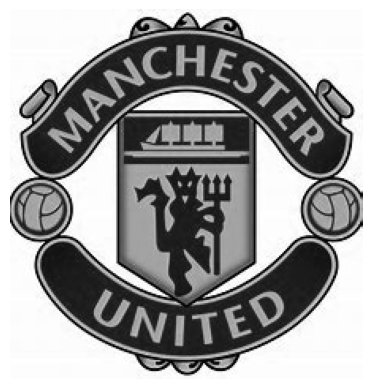

In [157]:
grayImg = cv.cvtColor(foto, cv.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap="gray")
plt.axis("off")
plt.show()

## Melakukan Perbaikan Kualitas Citra atau Filtering

### Filtering dengan Menggunakan Mean

In [158]:
def FilterMean(image,baris,kolom):
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)), mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            ratarata = np.sum(_image[i:i+baris,j:j+kolom])/(baris*kolom)
            hasil[i,j] =ratarata
    return hasil

Code di atas merupakan sebuah fungsi `FilterMean` yang digunakan untuk melakukan proses filtering pada gambar menggunakan metode mean filter. Fungsi ini menerima tiga parameter yaitu `image` yang merupakan gambar input, `baris` yang merupakan ukuran kernel filter untuk baris, dan `kolom` yang merupakan ukuran kernel filter untuk kolom. Pertama, fungsi ini membuat matriks kosong `hasil` dengan ukuran yang sama dengan gambar input. Kemudian, nilai `_baris` dan `_kolom` dihitung sebagai setengah dari ukuran kernel minus satu. Gambar input kemudian di pad menggunakan nilai `_baris` dan `_kolom` dengan mode `edge`. Selanjutnya, dilakukan perulangan pada setiap piksel pada gambar input. Pada setiap perulangan, nilai rata-rata dari bagian gambar yang sesuai dengan ukuran kernel dihitung dan disimpan di matriks `hasil`. Terakhir, matriks `hasil` yang telah di filter dikembalikan sebagai output dari fungsi ini.

### Filtering dengan Menggunakan Modus

In [159]:
def FilterModus(image, baris, kolom):
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image, ((_baris, _baris), (_kolom, _kolom)), mode='edge')
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            Modus = _image[i:i+baris, j:j+kolom]
            index = np.zeros(256)  
            for k in range(Modus.shape[0]):
                for l in range(Modus.shape[1]):
                    index[Modus[k, l]] += 1
            Max = np.max(index)
            for m in range(index.shape[0]):
                if Max == index[m]:
                    _Max = m
            hasil[i, j] = _Max
    return hasil

Code di atas merupakan sebuah fungsi `FilterModus` yang digunakan untuk menerapkan filter modus pada gambar input. Fungsi ini menerima tiga parameter yaitu `image`, `baris`, dan `kolom`, yang menentukan ukuran kernel filter. Pertama, fungsi membuat matriks kosong `hasil` dengan ukuran yang sama dengan gambar input. Kemudian dilakukan padding pada gambar input sesuai dengan ukuran kernel. Selanjutnya, dilakukan perulangan pada setiap piksel pada gambar input. Pada setiap perulangan, dilakukan pengambilan sub-matriks sesuai dengan ukuran kernel. Frekuensi kemunculan setiap nilai piksel pada sub-matriks tersebut dicatat menggunakan array `index`. Nilai modus dari sub matriks dihitung dengan mencari nilai piksel dengan frekuensi kemunculan tertinggi. Hasil modus disimpan pada matriks `hasil`. Terakhir, matriks `hasil` yang telah difilter dengan modus dikembalikan sebagai output dari fungsi ini.

### Filtering dengan Menggunakan Median

In [160]:
def FilterMedian(image,baris,kolom):
    tengah = int(baris*kolom/2)
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            Median = np.zeros(baris*kolom)
            m=0
            for k in range (i,i+baris):
                for l in range (j,j+kolom):
                    Median[m]=_image[k,l]
                    m+=1
            Median.sort()
            a = Median[tengah]
            b = Median[tengah-1]
            _Median = int(a+b)/2
            hasil[i,j] =_Median
    return hasil

Code di atas merupakan sebuah fungsi `FilterMedian` yang bertujuan untuk menerapkan filter median pada gambar input. Fungsi ini menerima tiga parameter yaitu `image`, `baris`, dan `kolom`, yang menentukan ukuran kernel filter. Pertama, dilakukan perhitungan indeks tengah dari seluruh elemen pada kernel filter. Matriks kosong `hasil` dibuat dengan ukuran yang sama dengan gambar input. Kemudian dilakukan padding pada gambar input sesuai dengan ukuran kernel. Selanjutnya, dilakukan perulangan pada setiap piksel pada gambar input. Pada setiap perulangan, sub matriks sesuai dengan ukuran kernel diambil dan nilai-nilai pikselnya disalin ke dalam array `Median`. Array `Median` kemudian diurutkan. Nilai median dari array `Median` dihitung, dengan memperhitungkan kasus ketika ukuran kernel adalah genap. Nilai median tersebut kemudian disimpan pada matriks `hasil`. Terakhir, matriks `hasil` yang telah difilter dengan median dikembalikan sebagai output dari fungsi ini. Proses ini memungkinkan penggunaan filter median untuk mengurangi noise pada gambar dengan mempertimbangkan nilai piksel di sekitarnya.

### Melakukan Konvolusi Citra

In [161]:
def konvolusi(image, kernel):
    pad_size = kernel.shape[0] // 2
    gambar_input = np.pad(image, pad_size, mode='constant')
    gambar_konvolusi = np.zeros_like(image).astype(np.float32)
    baris, kolom = image.shape
    for i in range(baris):
        for j in range(kolom):
            gambar_konvolusi[i, j] = np.sum(gambar_input[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)
    return gambar_konvolusi

Code di atas merupakan sebuah fungsi `konvolusi` yang digunakan untuk melakukan operasi konvolusi antara gambar dan kernel yang diberikan. Pertama, dilakukan padding pada gambar input dengan ukuran yang sesuai dengan kernel. Kemudian, dibuat matriks kosong `gambar_konvolusi` dengan ukuran yang sama dengan gambar input. Selanjutnya dilakukan perulangan pada setiap piksel pada gambar input. Pada setiap perulangan, diambil sub matriks sesuai dengan ukuran kernel, dan dilakukan perkalian elemen antara sub matriks tersebut dan kernel. Setelah itu, Hasil perkalian kemudian dijumlahkan, dan hasilnya disimpan di matriks `gambar_konvolusi`. Terakhir, Matriks `gambar_konvolusi` yang telah dihasilkan kemudian dikembalikan sebagai output dari fungsi ini.

### Mendefinisikan kernel smoothing dan sharpening

In [162]:
print(np.float32(1/10))
print(np.float32(1/5))
print(np.float32(8/9))
print(np.float32(1/9))

0.1
0.2
0.8888889
0.11111111


Code di atas akan menampilkan hasil dari pembagian dari `1/10`, `1/5`, `8/9`, dan `1/9`. Hasil dari pembagian tersebut ditampilkan menggunakan tipe data `float` yang berasal dari library numpy yaitu `np.float32`. Hal ini akan berpengaruh terhadap output, output akan menjadi bilangan desimal karena menggunakan tipe data float.

In [163]:
smoothing = np.array([[0.1, 0.1, 0.1],
                   [0.1, 0.2, 0.1],
                   [0.1, 0.1, 0.1]], dtype=np.float32)

sharpening = np.array([[0.11111111, 0.11111111, 0.11111111],
                    [0.11111111, 0.8888889, 0.11111111],
                    [0.11111111, 0.11111111, 0.11111111]], dtype=np.float32)

Code di atas merupakan pendefinisian dari dua buah kernel yaitu kernel `smoothing` dan `sharpening`. Kernel `smoothing` digunakan untuk membuat efek memperhalus pada gambar karena memiliki nilai bobot yang sama untuk setiap elemen. Sementara itu, kernel `sharpening` digunakan untuk meningkatkan kejelasan dan detail pada gambar karena memiliki nilai bobot yang lebih besar pada elemen tengah dan nilai bobot yang lebih kecil pada elemen lainnya. Kedua kernel ini dapat digunakan dalam operasi konvolusi untuk menghasilkan efek yang diinginkan pada gambar.

### Mendefinisikan kernel masing-masing metode

In [164]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

robert_x = np.array([[1, 0],
                     [0, -1]])

robert_y = np.array([[0, 1],
                     [-1, 0]])

Code di atas merupakan pendefinisian dari enam buah kernel yaitu kernel `sobel_x`, `sobel_y`, `prewitt_x`, `prewitt_y`, `robert_x`, dan `robert_y`. Masing-masing kernel memiliki matriks yang berbeda-beda. Untuk matriksnya sendiri mengikuti rumus masing-masing metode. Sobel dan Prewitt memiliki sensitivitas yang baik terhadap perubahan gradien baik secara horizontal maupun vertikal, sementara kernel Robert, meskipun lebih sederhana, tetap dapat mendeteksi tepi dengan akurasi yang cukup. Semua kernel ini merupakan alat penting dalam pengolahan gambar untuk berbagai aplikasi.

### Menampilkan Hasil Filter Mean, Modus, Median, Smoothing, dan Sharpening

Code di bawah ini akan melakukan pemrosesan gambar grayscale yaitu `grayImg` dengan berbagai teknik filtering seperti `mean`, `modus`, dan `median` menggunakan filter berukuran 3x3 dan 9x9. Teknik-teknik ini melibatkan fungsi-fungsi seperti FilterMean, FilterModus, dan FilterMedian. Hasil filtering kemudian ditampilkan dalam bentuk gambar menggunakan imshow dari Matplotlib. Plot tersebut memperlihatkan efek dari masing-masing teknik filtering, termasuk efek `mean`, `sharpening`, `smoothing`, `modus`, dan `median`, baik dengan ukuran kernel 3x3 maupun 9x9. Ini memungkinkan pengamat untuk membandingkan efek dari berbagai teknik filtering terhadap gambar.

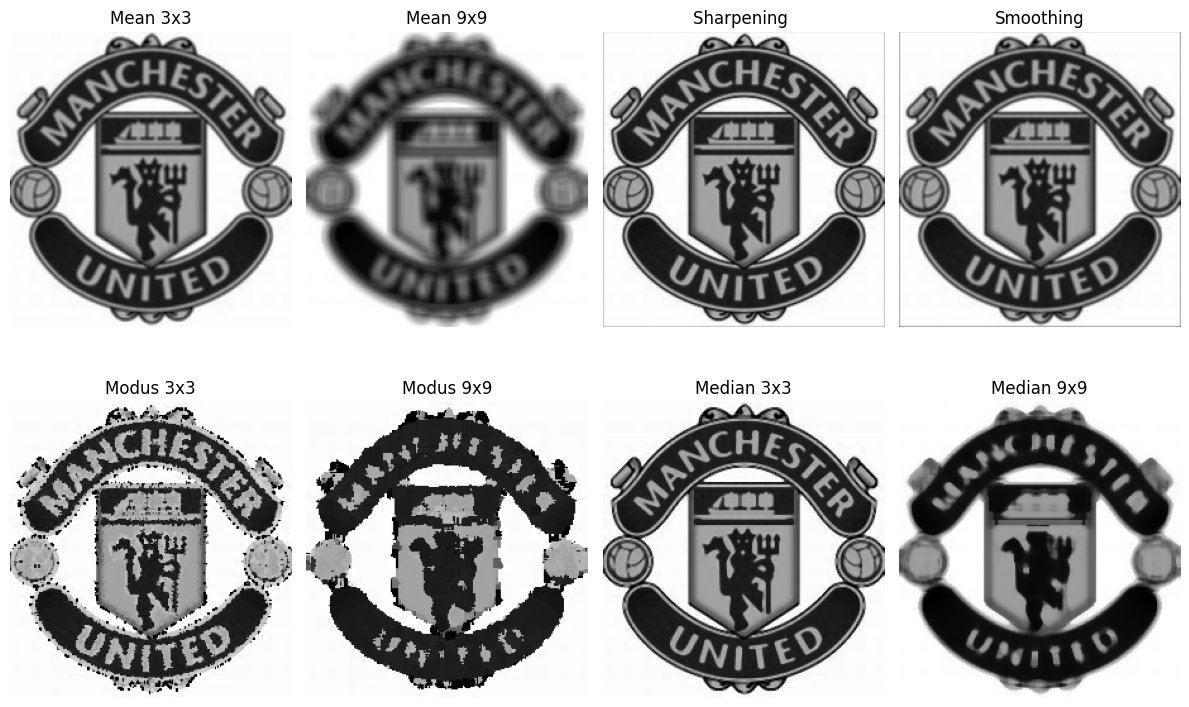

In [165]:
mean1 = FilterMean(grayImg, 3, 3)
mean2 = FilterMean(grayImg, 9, 9)
smooth1 = konvolusi(grayImg, smoothing)
sharpen1 = konvolusi(grayImg, sharpening)
modus1 = FilterModus(grayImg, 3, 3)
modus2 = FilterModus(grayImg, 9, 9)
median1 = FilterMedian(grayImg, 3, 3)
median2 = FilterMedian(grayImg, 9, 9)

plt.figure(figsize=(12, 8)) 

plt.subplot(2, 4, 1) 
plt.title('Mean 3x3')
plt.imshow(mean1, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2) 
plt.title('Mean 9x9')
plt.imshow(mean2, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3) 
plt.title('Sharpening ') 
plt.imshow(sharpen1, cmap="gray") 
plt.axis("off")

plt.subplot(2, 4, 4) 
plt.title('Smoothing')  
plt.imshow(smooth1, cmap="gray") 
plt.axis("off")

plt.subplot(2, 4, 5) 
plt.title('Modus 3x3')
plt.imshow(modus1, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)  
plt.title('Modus 9x9')
plt.imshow(modus2, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7) 
plt.title('Median 3x3')
plt.imshow(median1, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8) 
plt.title('Median 9x9')
plt.imshow(median2, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


## Menampilkan Hasil Deteksi Tepi dengan Menggunakan Operator Sobel, Prewiit, dan Robert

## Deteksi Tepi Menggunakan Operator Sobel

Code di bawah ini akan melakukan deteksi tepi pada gambar menggunakan operator `Sobel` setelah penerapan berbagai teknik filtering seperti `mean`, `modus`, dan `median` dengan filter berukuran 3x3 dan 9x9. Operator `Sobel` diterapkan secara terpisah pada gambar hasil filtering tersebut untuk menghasilkan gambar tepi dalam arah `horizontal` dan `vertikal`. Kemudian, magnitude dan arah dari tepi tersebut dihitung menggunakan rumus yang sesuai. Plot tersebut menampilkan hasil deteksi tepi menggunakan operator `Sobel` dari gambar hasil berbagai teknik filtering, memungkinkan pengamat untuk membandingkan efek dari teknik filtering tersebut terhadap deteksi tepi.

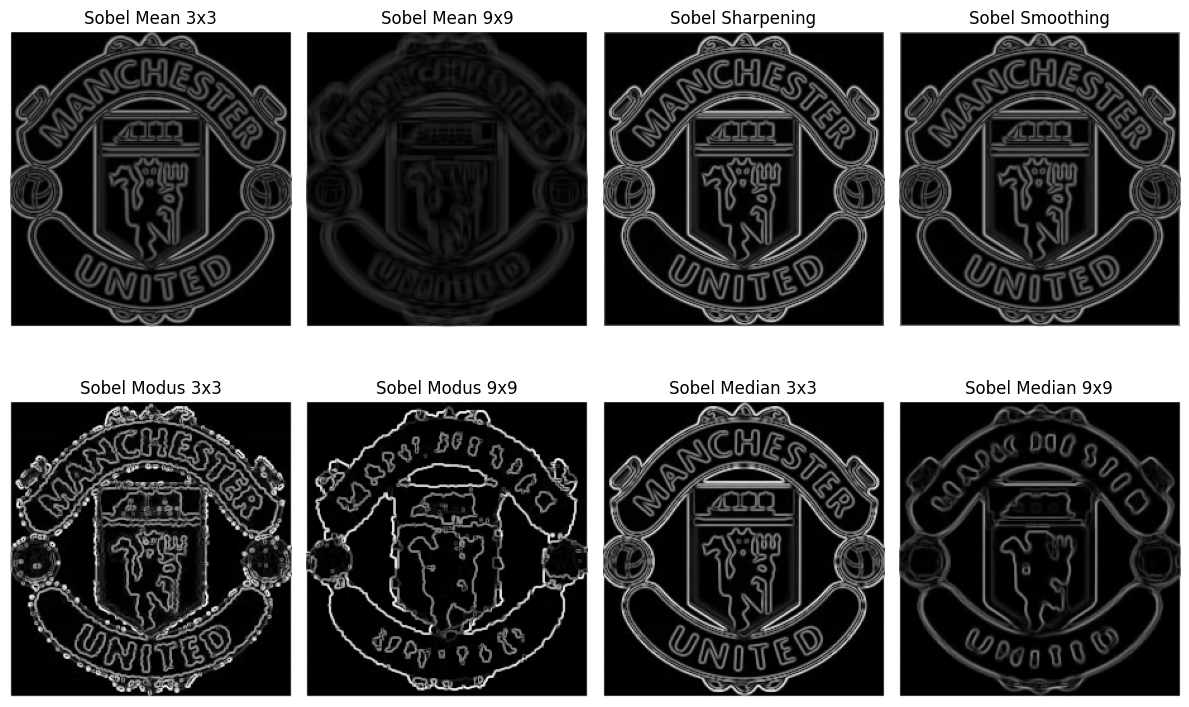

In [166]:
def edge_detection_sobel(image):
    edge_x = konvolusi(image, sobel_x)
    edge_y = konvolusi(image, sobel_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

sobel_mean_3x3, _ = edge_detection_sobel(mean1)
sobel_mean_9x9, _ = edge_detection_sobel(mean2)
sobel_smoothing, _ = edge_detection_sobel(smooth1)
sobel_sharpening, _ = edge_detection_sobel(sharpen1)
sobel_modus_3x3, _ = edge_detection_sobel(modus1)
sobel_modus_9x9, _ = edge_detection_sobel(modus2)
sobel_median_3x3, _ = edge_detection_sobel(median1)
sobel_median_9x9, _ = edge_detection_sobel(median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Sobel Mean 3x3')
plt.imshow(sobel_mean_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title('Sobel Mean 9x9')
plt.imshow(sobel_mean_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title('Sobel Sharpening')
plt.imshow(sobel_sharpening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title('Sobel Smoothing')
plt.imshow(sobel_smoothing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title('Sobel Modus 3x3')
plt.imshow(sobel_modus_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title('Sobel Modus 9x9')
plt.imshow(sobel_modus_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title('Sobel Median 3x3')
plt.imshow(sobel_median_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title('Sobel Median 9x9')
plt.imshow(sobel_median_9x9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


## Deteksi Tepi Menggunakan Operator Prewitt

Code di bawah ini akan melakukan deteksi tepi pada gambar menggunakan operator `Prewitt` setelah penerapan berbagai teknik filtering seperti `mean`, `modus`, dan `median` dengan filter berukuran 3x3 dan 9x9. Operator `Prewitt` diterapkan secara terpisah pada gambar hasil filtering tersebut untuk menghasilkan gambar tepi dalam arah `horizontal` dan `vertikal`. Kemudian, magnitude dan arah dari tepi tersebut dihitung menggunakan rumus yang sesuai. Plot tersebut menampilkan hasil deteksi tepi menggunakan operator Prewitt dari gambar hasil berbagai teknik filtering, memungkinkan pengamat untuk membandingkan efek dari teknik filtering tersebut terhadap deteksi tepi.

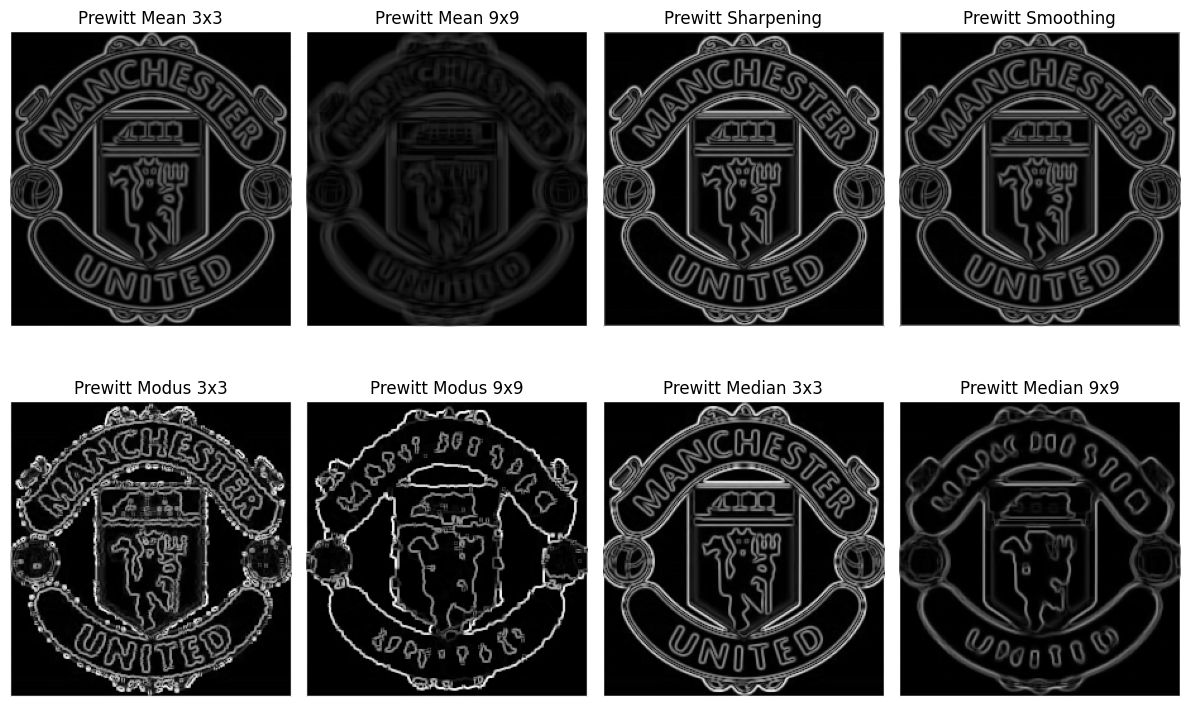

In [167]:
def edge_detection_prewitt(image):
    edge_x = konvolusi(image, prewitt_x)
    edge_y = konvolusi(image, prewitt_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

prewitt_mean_3x3, _ = edge_detection_prewitt(mean1)
prewitt_mean_9x9, _ = edge_detection_prewitt(mean2)
prewitt_smoothing, _ = edge_detection_prewitt(smooth1)
prewitt_sharpening, _ = edge_detection_prewitt(sharpen1)
prewitt_modus_3x3, _ = edge_detection_prewitt(modus1)
prewitt_modus_9x9, _ = edge_detection_prewitt(modus2)
prewitt_median_3x3, _ = edge_detection_prewitt(median1)
prewitt_median_9x9, _ = edge_detection_prewitt(median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Prewitt Mean 3x3')
plt.imshow(prewitt_mean_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title('Prewitt Mean 9x9')
plt.imshow(prewitt_mean_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title('Prewitt Sharpening')
plt.imshow(prewitt_sharpening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title('Prewitt Smoothing')
plt.imshow(prewitt_smoothing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title('Prewitt Modus 3x3')
plt.imshow(prewitt_modus_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title('Prewitt Modus 9x9')
plt.imshow(prewitt_modus_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title('Prewitt Median 3x3')
plt.imshow(prewitt_median_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title('Prewitt Median 9x9')
plt.imshow(prewitt_median_9x9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


## Deteksi Tepi Menggunakan Operator Robert

Code di bawah ini akan melakukan deteksi tepi pada gambar menggunakan operator `Robert` setelah penerapan berbagai teknik filtering seperti `mean`, `modus`, dan `median` dengan filter berukuran 3x3 dan 9x9. Operator Robert diterapkan secara terpisah pada gambar hasil filtering tersebut untuk menghasilkan gambar tepi dalam arah `diagonal`. Kemudian, magnitude dan arah dari tepi tersebut dihitung menggunakan rumus yang sesuai. Plot tersebut menampilkan hasil deteksi tepi menggunakan operator Robert dari gambar hasil berbagai teknik filtering, memungkinkan pengamat untuk membandingkan efek dari teknik filtering tersebut terhadap deteksi tepi.

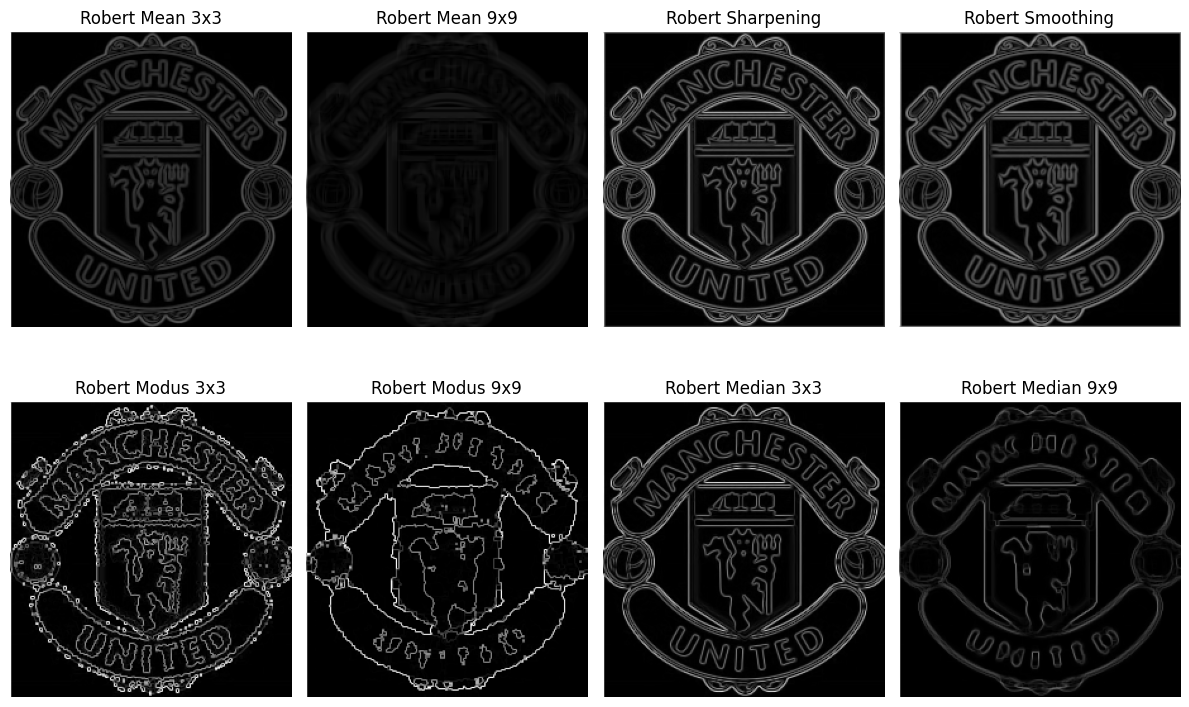

In [168]:
def edge_detection_robert(image):
    edge_x = konvolusi(image, robert_x)
    edge_y = konvolusi(image, robert_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

robert_mean_3x3, _ = edge_detection_robert(mean1)
robert_mean_9x9, _ = edge_detection_robert(mean2)
robert_smoothing, _ = edge_detection_robert(smooth1)
robert_sharpening, _ = edge_detection_robert(sharpen1)
robert_modus_3x3, _ = edge_detection_robert(modus1)
robert_modus_9x9, _ = edge_detection_robert(modus2)
robert_median_3x3, _ = edge_detection_robert(median1)
robert_median_9x9, _ = edge_detection_robert(median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Robert Mean 3x3')
plt.imshow(robert_mean_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title('Robert Mean 9x9')
plt.imshow(robert_mean_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title('Robert Sharpening')
plt.imshow(robert_sharpening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title('Robert Smoothing')
plt.imshow(robert_smoothing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title('Robert Modus 3x3')
plt.imshow(robert_modus_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title('Robert Modus 9x9')
plt.imshow(robert_modus_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title('Robert Median 3x3')
plt.imshow(robert_median_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title('Robert Median 9x9')
plt.imshow(robert_median_9x9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
